<h1><font color="red">ID card generator</font></h1>

### Installing dependencies

In [183]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install arabic_reshaper

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


### Importing libraries

In [1]:
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageDraw, ImageFont

### Reading the data

In [85]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\cin-de-1-à-50.csv')

In [86]:
df

,refF,id,fname,name,dob,pob,refB,mname,occ,add,date
0,1ف,11827636,صوة,أشرف,1 جويلية 1999,فانو,1ب,شادية بالقاسم,طالب,الشابة المهدية,19 جوان2019
1,2ف,11800502,الجليلي,أبان,2 مارس1996,فانو,2ب,وداد بحريني,معلم,رواد أريانة,20 ديسمبر 2014
2,3ف,11850603,حمدان,أبسل,3 ماي1997,فانو,3ب,ملكة سوسي,بناء,تستور باجة,5 أوت2015
3,4ف,11226573,العظمة,أبلج,4 جويلية1999,فانو,4ب,فريال بن محمود,مصور,منزل بورقيبة بنزرت,9 ديسمبر 2018
4,5ف,11548796,العافية,أبو بكر,5 أوت1995,فانو,5ب,ريم البنا,طالب,المحمدية بن عروس,14 مارس2013
5,6ف,11420760,القصيبي,أبو حمزة,6 فيفري1998,فانو,6ب,رانيا نصري,ممرض,قصور الساف المهدية,10 أوت2012
6,7ف,11820409,المرزوقي,أجاويد,7 سبتمبر1993,فانو,7ب,حميدة كوكي,محامي,الفحص زغوان,12 مارس2014
7,8ف,11410109,الناصري,أجيد,8 ديسمبر1991,فانو,8ب,سالما مختار,حارس,راس الجبل بنزرت,18 ديسمبر 2012
8,9ف,11249878,بدوي,أحنف,9 سبتمبر2000,فانو,9ب,سليم حسني,محاسب,المحمدية بن عروس,30 ماي2019
9,10ف,11463254,بشار,أحوس,10 ديسمبر1971,فانو,10ب,كيما الفيتوري,جزار,الفحص زغوان,19 سبتمبر1989


In [87]:
records = df.to_dict(orient='record')

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [88]:
records

[{'refF': '1ف',
  'id': 11827636,
  'fname': 'صوة',
  'name': 'أشرف',
  'dob': '1 جويلية 1999',
  'pob': 'فانو',
  'refB': '1ب',
  'mname': 'شادية بالقاسم',
  'occ': 'طالب',
  'add': 'الشابة المهدية',
  'date': '19 جوان2019'},
 {'refF': '2ف',
  'id': 11800502,
  'fname': 'الجليلي',
  'name': 'أبان',
  'dob': '2 مارس1996',
  'pob': 'فانو',
  'refB': '2ب',
  'mname': 'وداد بحريني ',
  'occ': 'معلم',
  'add': 'رواد  أريانة',
  'date': '20 ديسمبر 2014'},
 {'refF': '3ف',
  'id': 11850603,
  'fname': 'حمدان',
  'name': 'أبسل',
  'dob': '3 ماي1997',
  'pob': 'فانو',
  'refB': '3ب',
  'mname': 'ملكة سوسي ',
  'occ': ' بناء',
  'add': 'تستور  باجة',
  'date': '5 أوت2015'},
 {'refF': '4ف',
  'id': 11226573,
  'fname': 'العظمة',
  'name': 'أبلج',
  'dob': '4 جويلية1999',
  'pob': 'فانو',
  'refB': '4ب',
  'mname': 'فريال بن محمود ',
  'occ': 'مصور',
  'add': 'منزل بورقيبة بنزرت',
  'date': '9 ديسمبر 2018'},
 {'refF': '5ف',
  'id': 11548796,
  'fname': 'العافية',
  'name': 'أبو بكر',
  'dob': '5 أ

### Importing the font for the arabic writing

In [20]:
font = ImageFont.truetype(r"C:\Users\ASUS\Downloads\font\Janna LT Bold\Janna LT Bold.ttf", size=25)

### Reading the template for the ID card

In [89]:
templateF = Image.open(r'C:\Users\ASUS\Desktop\ID script\templateF.jpg')
templateB = Image.open(r'C:\Users\ASUS\Desktop\ID script\templateB.jpg')

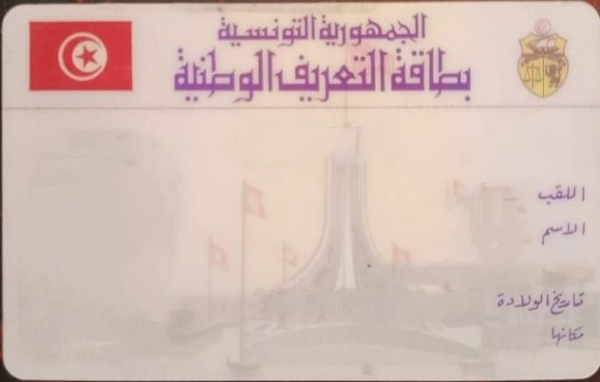

In [90]:
templateF

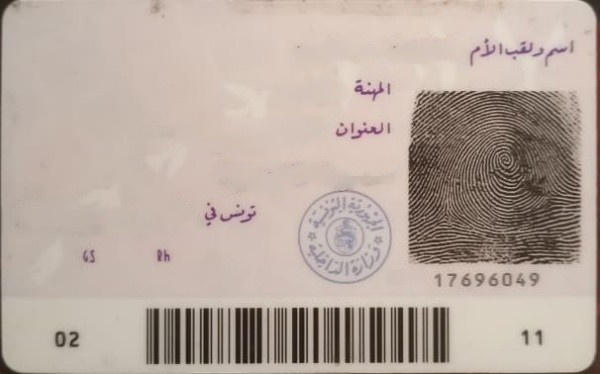

In [91]:
templateB

### The function that will generate the ID card from the data and will reshape the arabic words

In [92]:
def generate_cardF(data):
    templateF = Image.open(r'C:\Users\ASUS\Desktop\ID script\templateF.jpg')
    #pic = Image.open(f"photos/{data['id']}.jpg").resize((165, 190), Image.ANTIALIAS)
    #template.paste(pic, (25, 75, 190, 265))
    draw = ImageDraw.Draw(templateF)
    draw.text((387, 156), str(data['id']),anchor='rs',font=font, fill='black')
    draw.text((520, 200), get_display(arabic_reshaper.reshape(data["fname"])),anchor='rs', font=font,fill='black')
    draw.text((526, 236), get_display(arabic_reshaper.reshape(data['name'])),anchor='rs',font=font, fill='black')
    draw.text((483, 307), get_display(arabic_reshaper.reshape(data['dob'])),anchor='rs', font=font,fill='black')
    draw.text((527, 340), get_display(arabic_reshaper.reshape(data['pob'])),anchor='rs', font=font,fill='black')
    return templateF

In [93]:
def generate_cardB(data):
    templateB = Image.open(r'C:\Users\ASUS\Desktop\ID script\templateB.jpg')
    #pic = Image.open(f"photos/{data['id']}.jpg").resize((165, 190), Image.ANTIALIAS)
    #template.paste(pic, (25, 75, 190, 265))
    draw = ImageDraw.Draw(templateB)
    draw.text((457, 55), get_display(arabic_reshaper.reshape(data['mname'])),anchor='rs',font=font, fill='black')
    draw.text((336, 94), get_display(arabic_reshaper.reshape(data["occ"])),anchor='rs', font=font,fill='black')
    draw.text((324, 136), get_display(arabic_reshaper.reshape(data['add'])),anchor='rs',font=font, fill='black')
    draw.text((188, 217), get_display(arabic_reshaper.reshape(data['date'])),anchor='rs', font=font,fill='black')
    return templateB

### The output

In [94]:
for record in records:
    cardF = generate_cardF(record)
    cardB = generate_cardB(record)
    cardF.save(f"cards/{record['refF']}.jpg")
    cardB.save(f"cards/{record['refB']}.jpg")
    